In [3]:
import gensim
import pandas as pd

In [4]:
df = pd.read_json("Cell_Phones_and_Accessories_5.json", lines = True)
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A30TL5EWN6DFXT,120401325X,christina,"[0, 0]",They look good and stick good! I just don't li...,4,Looks Good,1400630400,"05 21, 2014"
1,ASY55RVNIL0UD,120401325X,emily l.,"[0, 0]",These stickers work like the review says they ...,5,Really great product.,1389657600,"01 14, 2014"
2,A2TMXE2AFO7ONB,120401325X,Erica,"[0, 0]",These are awesome and make my phone look so st...,5,LOVE LOVE LOVE,1403740800,"06 26, 2014"
3,AWJ0WZQYMYFQ4,120401325X,JM,"[4, 4]",Item arrived in great time and was in perfect ...,4,Cute!,1382313600,"10 21, 2013"
4,ATX7CZYFXI1KW,120401325X,patrice m rogoza,"[2, 3]","awesome! stays on, and looks great. can be use...",5,leopard home button sticker for iphone 4s,1359849600,"02 3, 2013"


In [5]:
df.shape

(194439, 9)

In [6]:
df.reviewText

0         They look good and stick good! I just don't li...
1         These stickers work like the review says they ...
2         These are awesome and make my phone look so st...
3         Item arrived in great time and was in perfect ...
4         awesome! stays on, and looks great. can be use...
                                ...                        
194434    Works great just like my original one. I reall...
194435    Great product. Great packaging. High quality a...
194436    This is a great cable, just as good as the mor...
194437    I really like it becasue it works well with my...
194438    product as described, I have wasted a lot of m...
Name: reviewText, Length: 194439, dtype: object

In [9]:
review_text = df.reviewText.apply(gensim.utils.simple_preprocess)
review_text

0         [they, look, good, and, stick, good, just, don...
1         [these, stickers, work, like, the, review, say...
2         [these, are, awesome, and, make, my, phone, lo...
3         [item, arrived, in, great, time, and, was, in,...
4         [awesome, stays, on, and, looks, great, can, b...
                                ...                        
194434    [works, great, just, like, my, original, one, ...
194435    [great, product, great, packaging, high, quali...
194436    [this, is, great, cable, just, as, good, as, t...
194437    [really, like, it, becasue, it, works, well, w...
194438    [product, as, described, have, wasted, lot, of...
Name: reviewText, Length: 194439, dtype: object

In [10]:
model = gensim.models.Word2Vec(
    window = 10,
    min_count=2,
    workers=4
)

In [11]:
model.build_vocab(review_text, progress_per=1000)

In [12]:
model.epochs

5

In [13]:
model.train(review_text, total_examples = model.corpus_count,epochs=model.epochs)

(61505205, 83868975)

In [14]:
model.save("./word2vec-amazon-accessories-reviews.model")

In [15]:
model.wv.most_similar("bad")

[('terrible', 0.6709699034690857),
 ('shabby', 0.6217479705810547),
 ('horrible', 0.5948497653007507),
 ('good', 0.5718942284584045),
 ('crappy', 0.5682984590530396),
 ('awful', 0.5296765565872192),
 ('okay', 0.5214533805847168),
 ('poor', 0.5206699371337891),
 ('funny', 0.5172343850135803),
 ('ok', 0.5112181901931763)]

In [176]:
import gensim
import pandas as pd
df_titles = pd.read_csv("C:\\Users\\amm98\\OneDrive\\Documents\\School\\2022_Winter\\COMP4990A\\Databases\\mas_title.txt", sep="\n", header=None, names=['Titles'],error_bad_lines=False, nrows=100000)
df_titles.head()

,Titles
0,Yield Optimization and Its Relation to Test
1,RF front-end system gain and linearity built-i...
2,Cellular Automata for Sequent ial Test Pattern...
3,Increasing testability by clock transformation...
4,9.1 Efficient Path Selection for Delay Testing...


In [179]:
title_text = df_titles.Titles.apply(gensim.utils.simple_preprocess)
title_text

0        [yield, optimization, and, its, relation, to, ...
1        [rf, front, end, system, gain, and, linearity,...
2        [cellular, automata, for, sequent, ial, test, ...
3        [increasing, testability, by, clock, transform...
4        [efficient, path, selection, for, delay, testi...
                               ...                        
99995        [practical, proofs, of, concurrent, programs]
99996                            [type, theory, in, color]
99997    [implementing, bit, addressing, with, speciali...
99998    [powerful, strategy, for, deriving, efficient,...
99999        [type, checking, with, open, type, functions]
Name: Titles, Length: 100000, dtype: object

In [142]:
model2 = gensim.models.Word2Vec(
    window = 10,
    min_count=2,
    workers=4
)

In [143]:
model2.build_vocab(title_text, progress_per=1000)

In [144]:
model2.epochs

5

In [145]:
model2.train(title_text, total_examples = model2.corpus_count,epochs=model2.epochs)

(22011826, 26724300)

In [147]:
model2.save("./COMPSCI_MEDICAL_TITLES.model")

In [148]:
model2.wv.most_similar("efficient")

[('effective', 0.7247443199157715),
 ('fast', 0.718085765838623),
 ('reliable', 0.6938692331314087),
 ('scalable', 0.6766212582588196),
 ('incremental', 0.6755085587501526),
 ('improved', 0.6672409176826477),
 ('optimized', 0.6653133630752563),
 ('iterative', 0.6498118042945862),
 ('optimal', 0.6333492994308472),
 ('combinatorial', 0.6288896203041077)]

In [149]:
import numpy as np

from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [150]:
def vectorize(list_of_titles, model):
    """Generate vectors for list of documents using a Word Embedding

    Args:
        list_of_docs: List of documents
        model: Gensim's Word Embedding

    Returns:
        List of document vectors
    """
    features = []

    for title in list_of_titles:
        zero_vector = np.zeros(model.vector_size)
        vectors = []
        for word in title:
            if word in model.wv:
                try:
                    vectors.append(model.wv[word])
                except KeyError:
                    continue
        if vectors:
            vectors = np.asarray(vectors)
            avg_vec = vectors.mean(axis=0)
            features.append(avg_vec)
        else:
            features.append(zero_vector)
    return features
    
vectorized_titles = vectorize(title_text, model=model2)
len(vectorized_titles), len(vectorized_titles[0])

(500000, 100)

In [151]:
def mbkmeans_clusters(
	X, 
    k, 
    mb, 
    print_silhouette_values, 
):
    """Generate clusters and print Silhouette metrics using MBKmeans

    Args:
        X: Matrix of features.
        k: Number of clusters.
        mb: Size of mini-batches.
        print_silhouette_values: Print silhouette values per cluster.

    Returns:
        Trained clustering model and labels based on X.
    """
    km = MiniBatchKMeans(n_clusters=k, batch_size=mb).fit(X)
    print(f"For n_clusters = {k}")
    print(f"Silhouette coefficient: {silhouette_score(X, km.labels_):0.2f}")
    print(f"Inertia:{km.inertia_}")

    if print_silhouette_values:
        sample_silhouette_values = silhouette_samples(X, km.labels_)
        print(f"Silhouette values:")
        silhouette_values = []
        for i in range(k):
            cluster_silhouette_values = sample_silhouette_values[km.labels_ == i]
            silhouette_values.append(
                (
                    i,
                    cluster_silhouette_values.shape[0],
                    cluster_silhouette_values.mean(),
                    cluster_silhouette_values.min(),
                    cluster_silhouette_values.max(),
                )
            )
        silhouette_values = sorted(
            silhouette_values, key=lambda tup: tup[2], reverse=True
        )
        for s in silhouette_values:
            print(
                f"    Cluster {s[0]}: Size:{s[1]} | Avg:{s[2]:.2f} | Min:{s[3]:.2f} | Max: {s[4]:.2f}"
            )
    return km,km.labels_


In [152]:
num_clusters = 200
clustering, cluster_labels = mbkmeans_clusters(
	X=vectorized_titles,
    k=num_clusters,
    mb=500,
    print_silhouette_values=True
)


For n_clusters = 200
Silhouette coefficient: 0.04
Inertia:4920121.080243254
Silhouette values:
    Cluster 105: Size:116 | Avg:0.84 | Min:-0.03 | Max: 0.93
    Cluster 158: Size:1494 | Avg:0.34 | Min:0.02 | Max: 0.54
    Cluster 43: Size:4030 | Avg:0.34 | Min:0.02 | Max: 0.54
    Cluster 22: Size:3323 | Avg:0.26 | Min:0.03 | Max: 0.43
    Cluster 122: Size:2170 | Avg:0.26 | Min:-0.04 | Max: 0.46
    Cluster 9: Size:2531 | Avg:0.23 | Min:-0.10 | Max: 0.49
    Cluster 20: Size:1830 | Avg:0.21 | Min:0.01 | Max: 0.43
    Cluster 102: Size:1516 | Avg:0.20 | Min:-0.03 | Max: 0.40
    Cluster 32: Size:1795 | Avg:0.18 | Min:-0.07 | Max: 0.39
    Cluster 128: Size:1457 | Avg:0.18 | Min:-0.04 | Max: 0.31
    Cluster 74: Size:1209 | Avg:0.17 | Min:-0.03 | Max: 0.35
    Cluster 167: Size:2315 | Avg:0.17 | Min:-0.02 | Max: 0.38
    Cluster 172: Size:1504 | Avg:0.17 | Min:-0.05 | Max: 0.39
    Cluster 136: Size:2281 | Avg:0.16 | Min:-0.02 | Max: 0.37
    Cluster 134: Size:436 | Avg:0.15 | Min:-0.01 

In [154]:
df_clusters = pd.DataFrame({
    "tokens": [" ".join(text) for text in title_text],
    "cluster": cluster_labels
})

In [156]:
print("Most representative terms per cluster (based on centroids):")
for i in range(num_clusters):
    tokens_per_cluster = ""
    most_representative = model2.wv.most_similar(positive=[clustering.cluster_centers_[i]], topn=5)
    for t in most_representative:
        tokens_per_cluster += f"{t[0]} "
    print(f"Cluster {i}: {tokens_per_cluster}")

Most representative terms per cluster (based on centroids):
Cluster 0: concurrent abstraction modules compilation dataflow 
Cluster 1: die lösungen produkte beim ergebnisse 
Cluster 2: participation caring promoting expectations competence 
Cluster 3: bipolar zeolite controllable mesoporous silicon 
Cluster 4: duration individual variety acceptance functioning 
Cluster 5: fünfte ostwalds abteilung hrsg vorträge 
Cluster 6: iodine catalytic cyclic unsaturated alkanes 
Cluster 7: requirements maintenance scenarios flexibility capability 
Cluster 8: constrained placement optimisation robustness redundancy 
Cluster 9: un du les la pour 
Cluster 10: horizontal with eliminating redundancy verkaufsbüro 
Cluster 11: robustness precise indirect advantages redundancy 
Cluster 12: bor ungewöhnliche reaktivität aktive stabile 
Cluster 13: spontaneous tract turnover fractions differentiation 
Cluster 14: stoffe produkte elektrische künstliche optische 
Cluster 15: mit drei aus bipyramidalen gegenüb

Cluster 171: capability workload module operations capabilities 
Cluster 172: mit drei koordinierten zwei bor 
Cluster 173: dynamically redundancy lsi stack precise 
Cluster 174: in surrounding habits individual post 
Cluster 175: the late surrounding shallow nitrogenous 
Cluster 176: advantages acetons nitrons telephone auges 
Cluster 177: retention nitrogenous sugar beet grass 
Cluster 178: hydrophobic soluble aggregates micelles forming 
Cluster 179: simulation simulations operations simulating scenarios 
Cluster 180: capability workload scenarios merging hierarchical 
Cluster 181: cyclic iodine unsaturated stable elimination 
Cluster 182: bipolar monolithic ic amplifiers flux 
Cluster 183: broadcast redundancy reliable dynamically replica 
Cluster 184: to can readmissions without does 
Cluster 185: supernova deep nebulae shallow at 
Cluster 186: robustness deep adjustment timing advantages 
Cluster 187: neutral anionic zinc boron stable 
Cluster 188: priority dispatching placement 

In [163]:
df_clusters[df_clusters.cluster == 165].head(50)



,tokens,cluster
4194,the bulk index join,165
4567,db lobs the teenage years,165
8183,estimating the number of substring matches in ...,165
9422,characteristics of the double avalanche region...,165
11033,modeling the evolution of topics in source cod...,165
12405,the photon pipeline,165
15085,computing regions decomposable into stars,165
17466,ambiguity resolution in the dmtrans plus,165
17915,ambiguity resolution in the,165
18979,region counting distances and region counting ...,165


In [ ]:
df_clusters[df_clusters.cluster == 161].head(60)

In [164]:
from sklearn.decomposition import PCA

#Load Data
data = vectorized_titles
pca = PCA(2)
 
#Transform the data
df = pca.fit_transform(data)
 
df.shape

(500000, 2)

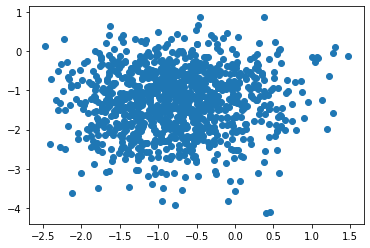

In [165]:
import matplotlib.pyplot as plt
 
#filter rows of original data
filtered_label0 = df[df_clusters.cluster == 0]
 
#plotting the results
plt.scatter(filtered_label0[:,0] , filtered_label0[:,1])
plt.show()

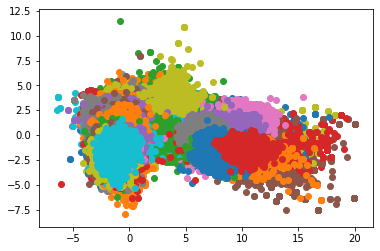

In [167]:
#Getting unique labels
 
u_labels = np.unique(cluster_labels)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(df[df_clusters.cluster == i , 0] , df[df_clusters.cluster == i , 1] , label = i)
#plt.legend()
plt.show()